# what is shap?

A game theoretic approach to explain the output of any machine learning model.






SHAP (SHapley Additive exPlanations) is based on Shapley values, a concept from cooperative game theory. It follows these key game theory principles:

#### Characteristic Function Form

- In game theory, the characteristic function defines the value (or payoff) of a coalition (subset of players).

- In SHAP, this function is the ML model’s output, and the "players" are the features contributing to the prediction.

#### Fair Distribution (Shapley Axioms)

SHAP satisfies four fairness axioms from game theory:

- Efficiency – SHAP values sum up to the difference between the model’s prediction and the expected output.

- Symmetry – If two features contribute equally, they get the same SHAP value.

- Dummy Property – A feature that does not change predictions gets a SHAP value of 0.

- Additivity – If two models are combined, SHAP values for features add up accordingly.

#### Marginal Contribution Calculation

- SHAP evaluates all possible feature coalitions and computes the average marginal contribution of a feature across them.

- This ensures a fair attribution of importance to each feature.

Conclusion

SHAP follows cooperative game theory settings where features are "players", and the ML model’s prediction is the "payout" to be fairly distributed. 🚀

### why shap

- Linear models, for example, can use their coefficients as a metric for the overall importance of each feature, but they are scaled with the scale of the variable itself, which might lead to distortions and misinterpretations. 

- Also, the coefficient cannot account for the local importance of the feature, and how it changes with lower or higher values. The same can be said for feature importances of tree-based models, and this is why SHAP is useful for interpretability of models

 
### Use Cases of SHAP
 
 SHAP is widely used for interpreting and explaining machine learning models in various scenarios:
 
 - **Model Debugging:** Identify which features are driving predictions, helping to detect data leakage, spurious correlations, or unexpected model behavior.
 
 - **Feature Importance:** Quantify the contribution of each feature to individual predictions (local interpretability) and to the model as a whole (global interpretability).
 
 - **Regulatory Compliance:** Provide transparent explanations for model decisions, which is essential in regulated industries like finance, healthcare, and insurance.
 
 - **Trust and Transparency:** Build trust with stakeholders by showing how and why a model makes certain predictions.
 
 - **Bias Detection:** Detect and mitigate bias by analyzing how sensitive predictions are to certain features (e.g., gender, age).
 
 - **Model Comparison:** Compare different models by examining and contrasting their feature attributions.
 
 - **Customer-Facing Explanations:** Generate human-understandable explanations for end-users, such as why a loan application was approved or denied.
 
 SHAP can be applied to a wide range of models, including tree-based models, linear models, and deep learning models, making it a versatile tool for model interpretability.


 
 ### Step-by-Step: How SHAP Values Are Calculated
 
 1. **Choose the Instance to Explain**
    - Select a specific data point (row) for which you want to understand the model's prediction.
 
 2. **Enumerate All Possible Feature Coalitions**
    - For each feature, consider all possible subsets (coalitions) of the other features. [A coalition is a group of individuals, parties, or organizations that come together temporarily to achieve a common goal]
    - For a dataset with N features, there are 2^(N-1) possible coalitions for each feature.

      example, if there are 3 features A, B, C, the coalitions are AB, AC, BC, ABC. i.e 4 features
 
 3. **Compute Model Predictions for Each Coalition**
    - For each coalition, create a version of the instance where only the features in the coalition are known (the rest are "missing" or replaced with background values).
    - Use the model to predict the output for each coalition.
 
 4. **Calculate Marginal Contribution**
    - For each coalition, measure how much the prediction changes when the feature of interest is added to the coalition.
    - Marginal contribution = Prediction with the feature included - Prediction without the feature.

      example, to calculate for feature C, contribution of C=  Prediction of ABC - Prediction of AB
 
 5. **Average Over All Coalitions (Weighted)**
    - For each feature, average its marginal contributions across all possible coalitions. [example when there are 4 features ABCD, C1=ABC-AB, C2=ACD-AD, so average is needed for C's contribution]
    - Each coalition is weighted according to the Shapley formula to ensure fairness.
 
6. **Sum SHAP Values**
    - The sum of all SHAP values for the features equals the difference between the model's prediction for the instance and the average prediction over the background data.
    - The average prediction is typically calculated by taking the mean of the model's predictions over a set of background data points (often a random sample from the training set). This average serves as a baseline, representing what the model would predict if it had no information about the specific instance being explained.
 **Summary:**  
 SHAP values fairly distribute the difference between the model's prediction and the average prediction among the features, based on their contributions across all possible combinations.


In [4]:
import sklearn

import shap

# Initialize JavaScript for SHAP visualizations
shap.initjs()

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [5]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


# Types of plots in shap

### partial dependence plot

PDPs help visualize the marginal effect of a feature on the predicted outcome of a machine learning model.  By varying one feature while keeping others fixed, we can see how changes in that feature affect predictions.



ExactExplainer explainer: 1001it [00:14, 39.55it/s]                          


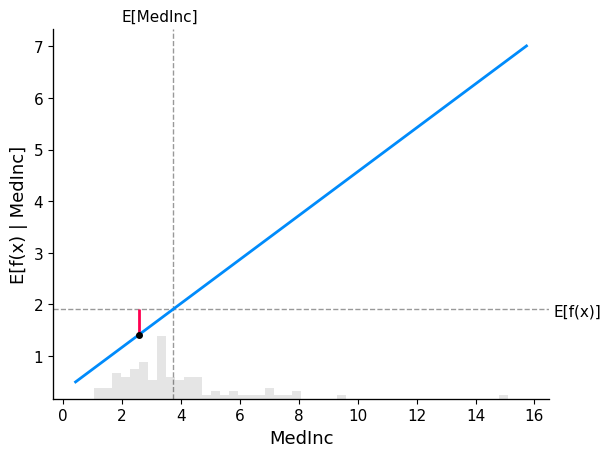

In [6]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 20
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind : sample_ind + 1, :],)

The solid blue line traces the partial dependence curve, demonstrating a strong positive, near-linear relationship: as MedInc increases, the expected prediction rises monotonically from approximately 1.5 at low incomes to over 6 at high incomes. This indicates that higher median incomes consistently drive upward shifts in predictions, with no evident saturation or reversal within the observed range.

### waterfall plot

We'll use the waterfall plot to visualize how each feature (for a given sample row) pushes the model's prediction from the expected value (the mean prediction) to the actual output. This helps explain the individual prediction by showing the contributions of the most important features.

it explain ***local*** impartance

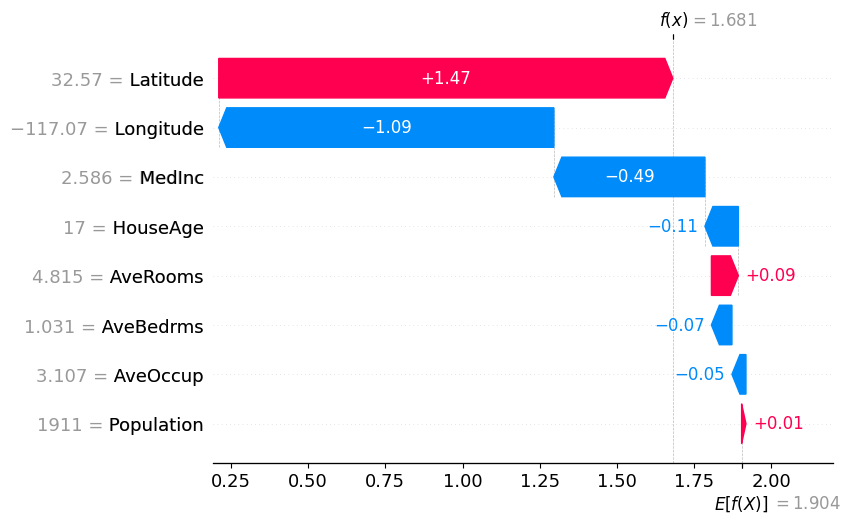

In [7]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In the waterfall above, the x-axis has the values of the target (dependent) variable which is the house price. x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))).

The SHAP value for each feature in this observation is given by the length of the bar. In the example above, Longitude has a SHAP value of -0.52, Latitude has a SHAP of +0.53 and so on. The sum of all SHAP values will be equal to E[f(x)] — f(x).

### bar plot


x axis: shap value
y acis: no yaxis


Passing a multi-row Explanation object creates a ***global*** feature importance plot.

Passing a single row of an explanation (i.e. shap_values[0]) creates a ***local*** feature importance plot.

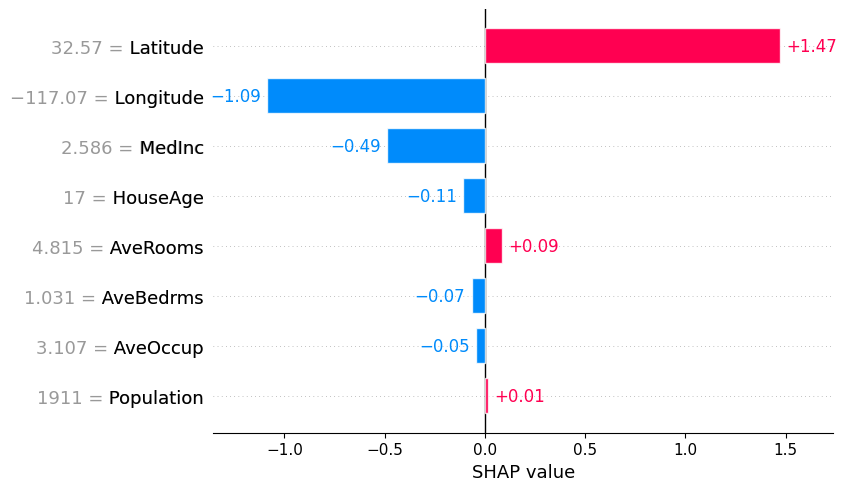

In [ ]:

shap.plots.bar(shap_values[sample_ind])


### force plot

The force plot visualizes how features contribute to pushing the model output from the expected value (the base value) to the prediction for an individual observation.
 
Specifically, passing a single row of shap_values (e.g., shap_values[sample_ind]) will show a ***local*** explanation (how each feature for that one data point pushes the prediction higher or lower relative to the expected value).
 
The interactive SHAP force plot shows the base value (E[f(x)]), the SHAP values for each feature (additive contributions), and the model output for the specified instance.


In [9]:
shap.initjs()
shap.plots.force(shap_values[sample_ind])


### swarm plot

The SHAP swarm plot (beeswarm) visualizes the distribution of SHAP values for all features and all samples. i.e ***global*** impartance
- Each dot represents a SHAP value for a feature in a single sample.
 - The color represents the feature value (red = high, blue = low).
 - The plot helps identify both the importance of features and how their values impact predictions.
 - Use: shap.plots.beeswarm(shap_values)


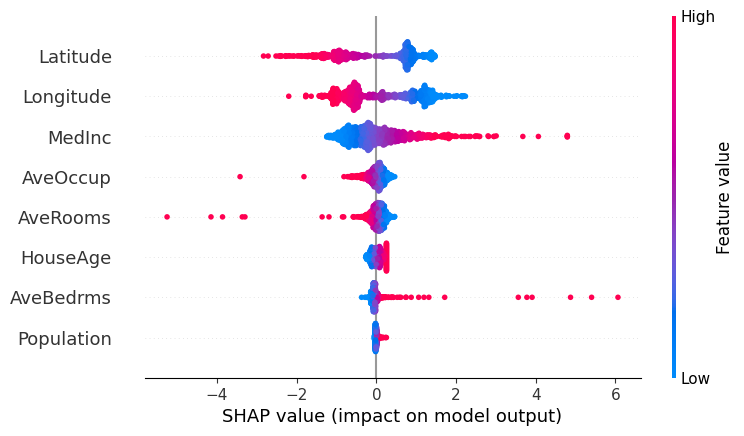

In [8]:
shap.plots.beeswarm(shap_values)  # this needs whole dataset, not single data point


### violin plot

The violin plot provides another way to visualize the distribution of SHAP values for each feature across the dataset.
 It combines aspects of a box plot with a kernel density plot, showing both summary statistics and the density of the data.
 In SHAP, the violin plot helps identify which features have higher impact and how their effects are distributed.
 Use: shap.summary_plot(shap_values, plot_type='violin')

 it provides ***global*** explaination


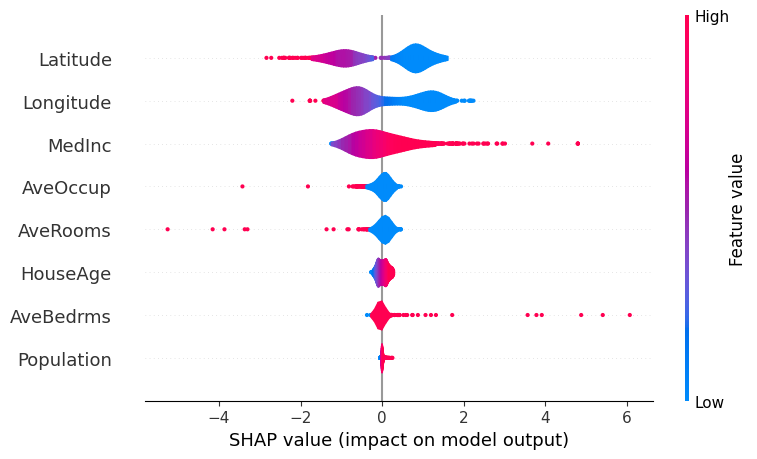

In [10]:
shap.summary_plot(shap_values, plot_type='violin') # similar to swarm plot


 #### Pros and Cons of SHAP

 **Pros:**
 - **Consistent and Theoretically Sound:** SHAP values are based on solid game theory, providing consistent and fair feature attributions.
 - **Model-Agnostic and Model-Specific:** SHAP can be used with any machine learning model (model-agnostic) and also has optimized implementations for tree-based models.
 - **Local and Global Explanations:** SHAP provides both local (individual prediction) and global (overall model) interpretability.
 - **Visualization Tools:** SHAP comes with a variety of intuitive plots (force, beeswarm, bar, etc.) for understanding feature impacts.
 - **Handles Feature Interactions:** SHAP can capture and display feature interactions, not just individual effects.

 **Cons:**
 - **Computationally Expensive:** Calculating exact SHAP values can be slow, especially for large datasets or complex models.
 - **Approximation Errors:** For some models, SHAP uses approximations (e.g., KernelExplainer), which may introduce errors.
 - **Interpretation Complexity:** For high-dimensional data, interpreting SHAP plots and values can become challenging.
 - **Assumption of Feature Independence:** Some SHAP explainers assume feature independence, which may not hold in real-world data.
 - **Resource Intensive:** Large memory and compute requirements for big datasets or deep models.
